### Importing libraries

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

### changing directory


In [21]:
os.chdir(r"F:\data softwares work\phython\for codes")

In [22]:
os.listdir()

['b_table.csv',
 'decision tree.png',
 'Feature_imp.csv',
 'fghjk.csv',
 'loadings.csv',
 'table.csv',
 'train_profile.csv',
 'Variance.csv']

### Reading black friday data

In [23]:
bf=pd.read_csv(r"F:\data softwares work\phython\BlackFriday\train\train.csv")

### Exploring data

In [24]:
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [25]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [26]:
bf.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [27]:
bf.shape

(550068, 12)

In [28]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### EDA
### univariate analysis

In [31]:
bf["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
9004       1
18376      1
4721       1
21282      1
23896      1
Name: Purchase, Length: 18105, dtype: int64

In [32]:
bf["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [33]:
bf["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00081342       1
P00203642       1
P00144942       1
P00228842       1
P00352042       1
Name: Product_ID, Length: 3631, dtype: int64

In [34]:
bf["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [35]:
bf["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [36]:
bf["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [37]:
bf["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [38]:
bf["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
bf["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [40]:
bf["Product_Category_1"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [41]:
bf["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [42]:
bf["Product_Category_3"].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [43]:
bf.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [44]:
bf.drop(columns=["User_ID","Product_ID"], inplace=True)

### checking outliers in the data

In [45]:
bf.describe(percentiles=[0.01,0.02, .03,0.04, 0.05, 0.1, .2, .25, .5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Occupation,550068.0,8.076707,6.522660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,14.0,17.0,20.0,20.0,20.0,20.00,20.0,20.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,8.0,11.0,13.0,15.0,16.0,16.00,18.0,20.0
Product_Category_2,376430.0,9.842329,5.086590,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,5.0,9.0,15.0,16.0,16.0,17.0,17.0,17.00,17.0,18.0
Product_Category_3,166821.0,12.668243,4.125338,3.0,4.0,5.0,5.0,5.0,5.0,5.0,...,9.0,14.0,16.0,17.0,17.0,17.0,17.0,18.00,18.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,587.0,954.0,1574.0,1789.0,1984.0,3540.0,...,5823.0,8047.0,12054.0,16317.0,19336.0,19480.0,19628.0,20202.66,20665.0,23961.0


### Bivariate analysis

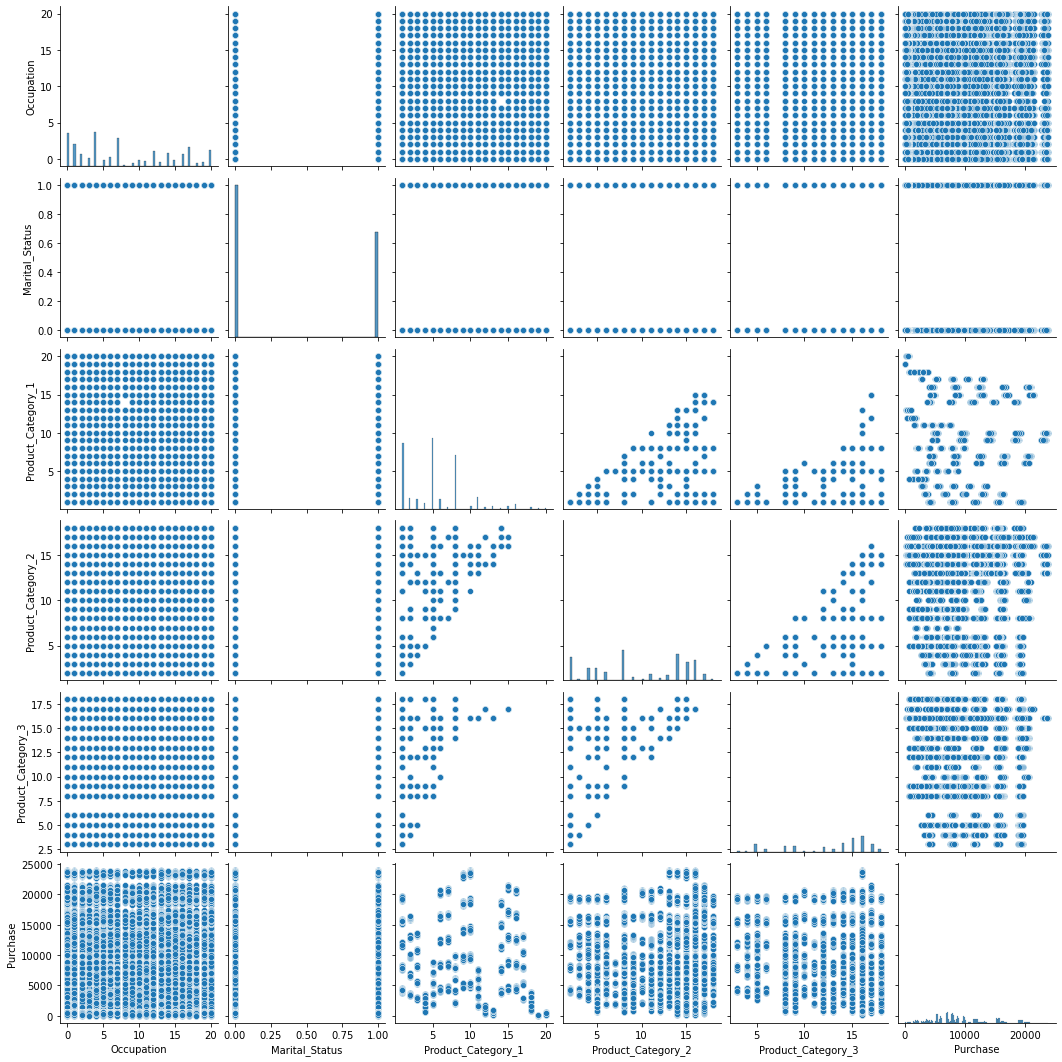

In [46]:
sns.pairplot(bf)
plt.show()

### Checking correlating columns

In [47]:
ln=bf.corr()

In [48]:
ln

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


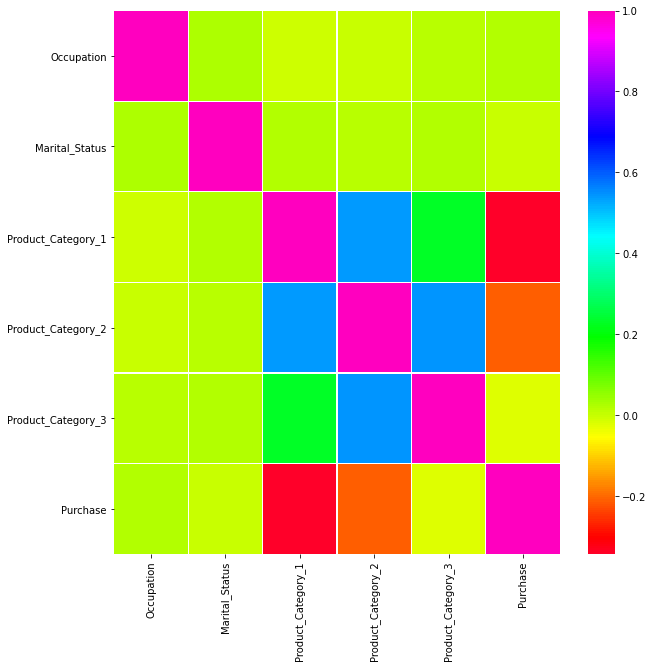

In [49]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(ln, ax=ax,cmap="gist_rainbow", linewidths=0.1)
plt.show()

In [50]:
bf.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [51]:
bf.fillna(value=0,inplace=True)   #removing missing values

In [52]:
bf.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [53]:
bf["Gender"]=np.where(bf["Gender"]=="M", 1, 2)


In [54]:
bf["Gender"].value_counts()

1    414259
2    135809
Name: Gender, dtype: int64

In [55]:
bf_dummy=pd.get_dummies(bf, columns=["Age","City_Category","Stay_In_Current_City_Years","Marital_Status"],prefix=["Age","City_Category","Stay_In_Current_City_Years","Marital_Status"],drop_first=True)

In [56]:
bf_dummy.shape

(550068, 19)

In [57]:
bf_dummy.isnull().sum()

Gender                           0
Occupation                       0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Age_18-25                        0
Age_26-35                        0
Age_36-45                        0
Age_46-50                        0
Age_51-55                        0
Age_55+                          0
City_Category_B                  0
City_Category_C                  0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
Marital_Status_1                 0
dtype: int64

In [58]:
bf_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Gender                         550068 non-null  int32  
 1   Occupation                     550068 non-null  int64  
 2   Product_Category_1             550068 non-null  int64  
 3   Product_Category_2             550068 non-null  float64
 4   Product_Category_3             550068 non-null  float64
 5   Purchase                       550068 non-null  int64  
 6   Age_18-25                      550068 non-null  uint8  
 7   Age_26-35                      550068 non-null  uint8  
 8   Age_36-45                      550068 non-null  uint8  
 9   Age_46-50                      550068 non-null  uint8  
 10  Age_51-55                      550068 non-null  uint8  
 11  Age_55+                        550068 non-null  uint8  
 12  City_Category_B               

In [59]:
X=bf_dummy.drop(columns=["Purchase"])
y=bf_dummy["Purchase"]

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [61]:
from sklearn.tree import DecisionTreeRegressor

dt1=DecisionTreeRegressor(random_state=89)

dt1.fit(X_train, y_train)

print("Train accuracy:", dt1.score(X_train,y_train))

print("Test accuracy:", dt1.score(X_test,y_test))


Train accuracy: 0.8026586623261507
Test accuracy: 0.5625642256443464


In [62]:
dt1=DecisionTreeRegressor(max_depth=13,min_samples_split=150,min_samples_leaf=10)
dt1.fit(X_train, y_train)
print("Train accuracy:", dt1.score(X_train,y_train))
print("Test accuracy:", dt1.score(X_test,y_test))

Train accuracy: 0.6654775437978707
Test accuracy: 0.658351293198976


In [63]:
from sklearn.model_selection import GridSearchCV

parameters = {'min_samples_split':[100,150,200], 
              'max_depth':[11,12],
              "min_samples_leaf":[5,10,50]}

tr = DecisionTreeRegressor(random_state=89)

gsearch = GridSearchCV(tr, param_grid=parameters, cv=10, verbose=1, n_jobs=-1)

gsearch.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=89), n_jobs=-1,
             param_grid={'max_depth': [11, 12], 'min_samples_leaf': [5, 10, 50],
                         'min_samples_split': [100, 150, 200]},
             verbose=1)

In [64]:
gsearch.best_params_

{'max_depth': 12, 'min_samples_leaf': 50, 'min_samples_split': 200}

In [65]:
gsearch.best_score_

0.6572942628859438

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf1=RandomForestRegressor()

In [75]:
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 0.791629594292763
Test Accuracy : 0.6334885318006077


In [ ]:
fit_rf = RandomForestRegressor(random_state=42)
param_dist = {'max_depth':[5,6,7,10],
              'min_samples_split':[2,4,6,10],
              'n_estimators':[10,25, 50, 100]}
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'log2', None],
              #'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = -1, verbose=1)

cv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [ ]:
cv_rf.best_params_

In [ ]:
cv_rf.best_score_